In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data Loading

In [5]:
df = pd.read_csv('Marketing-Customer-Value-Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
df.shape

(9134, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [10]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

## 2. Exploratory Data Analysis

Explore the dataset to understand customer behaviors and reaction to different marketing strategies

### 2.1 Marketing Engagement

In [12]:
# Count the number of customers who have responded to the marketing promotion strategies
df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

In [16]:
# calculate the percentage of customers engaged in the marketing strategies
perc = df.groupby('Response').count()['Customer']/df.shape[0]
perc

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

In [17]:
perc[1] * df.shape[0]

1307.9999999999998

Approximately 14.32% of total customers responded to the marketing calls. Since we have a total of 9134 customers, approximately 1308 customers responded.

Text(0, 0.5, 'Count')

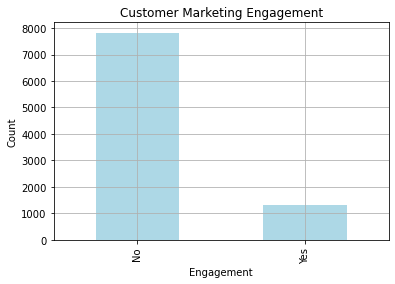

In [13]:
# Create visualization
ax = df.groupby('Response').count()['Customer'].plot(kind = 'bar', color='lightblue',grid = True,
                                                    title = 'Customer Marketing Engagement')
ax.set_xlabel('Engagement')
ax.set_ylabel('Count')

### 2.2 Engagement by Offer Type

In [21]:
# Count number of engaged customers by different offer type
offer_type_df = df.loc[df['Response'] == 'Yes'].groupby(['Renew Offer Type']).count()['Customer']
offer_type_df

Renew Offer Type
Offer1    594
Offer2    684
Offer3     30
Name: Customer, dtype: int64

In [26]:
offer_type_rate = offer_type_df / df.groupby('Renew Offer Type').count()['Customer']
offer_type_rate

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

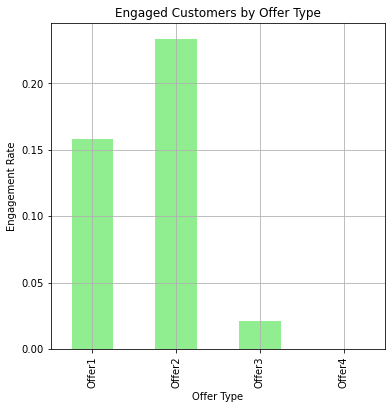

In [46]:
# Visualize the distribution
ax1 = offer_type_rate.plot(kind = 'bar', color = 'lightgreen', grid = True, figsize = (6,6),
                          title = 'Engaged Customers by Offer Type')
ax1.set_xlabel('Offer Type')
ax1.set_ylabel('Engagement Rate')
plt.show()

Most customers engaged were in offer type 2, which is 23.38% of total engaged customers. No customers were engaged with offer type 4. The company might want to explore the effectiveness of offer type 4. Additionally, engaged customers with offer type 3 only consists of 2.1% of total engaged customers. The company might also explore the reason behind that (launch time, effectiveness, customer interests...)

### 2.3 Offer Type vs Vehicle Class 

In [40]:
offer_vehicle_df = df.loc[df['Response'] == 'Yes'].groupby(['Renew Offer Type','Vehicle Class']).count()['Customer']
offer_vehicle_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    264
                  Luxury Car         6
                  Luxury SUV        18
                  SUV              168
                  Sports Car        42
                  Two-Door Car      96
Offer2            Four-Door Car    336
                  Luxury Car         6
                  Luxury SUV        12
                  SUV              120
                  Sports Car        48
                  Two-Door Car     162
Offer3            Four-Door Car     24
                  Two-Door Car       6
Name: Customer, dtype: int64

In [41]:
offer_vehicle_rate = offer_vehicle_df / df.groupby('Renew Offer Type').count()['Customer']
offer_vehicle_rate

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [45]:
offer_vehicle_rate = offer_vehicle_rate.unstack().fillna(0)
offer_vehicle_rate

0                                             \
                      Customer                                              
Vehicle Class    Four-Door Car Luxury Car Luxury SUV       SUV Sports Car   
Renew Offer Type                                                            
Offer1                0.070362   0.001599   0.004797  0.044776   0.011194   
Offer2                0.114833   0.002051   0.004101  0.041012   0.016405   
Offer3                0.016760   0.000000   0.000000  0.000000   0.000000   

                               
                               
Vehicle Class    Two-Door Car  
Renew Offer Type               
Offer1               0.025586  
Offer2               0.055366  
Offer3               0.004190

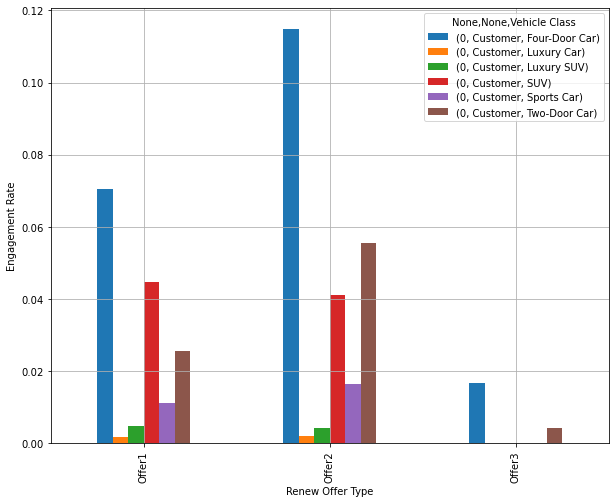

In [57]:
ax2 = offer_vehicle_rate.plot(kind=('bar'), figsize = (10,8), grid=True)
ax2.set_ylabel('Engagement Rate')
plt.show()

Customers with four-door cars respond more frequently to all types of offers; customers with Luxury SUV respond more to Offer1 than to Offer2; customers with two-door cars reponsd more to Offer2 than to Offer1. This analysis is significant because we can target different groups of customers based on their car types. 

### 2.4 Engagement Rates by Sales Channel

In [59]:
sales_channel = df.loc[df['Response'] == 'Yes'].groupby(['Sales Channel']).count()['Customer']
sales_channel

Sales Channel
Agent          666
Branch         294
Call Center    192
Web            156
Name: Customer, dtype: int64

In [61]:
sales_channel_rate = sales_channel/df.groupby('Sales Channel').count()['Customer']
sales_channel_rate

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

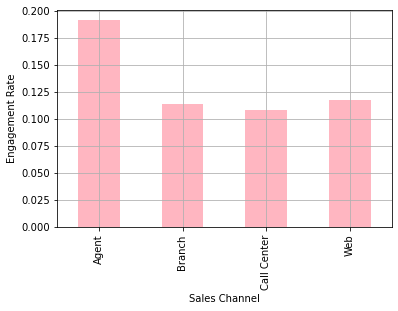

In [62]:
ax4 = (sales_channel_rate).plot(kind = 'bar', color = 'lightpink', grid = True)
ax4.set_ylabel('Engagement Rate')
plt.show()

As shown in the graph, customers who were contacted by agents achieve the most responses. The three other sales channels, branch, call center, and web, achieve approximately same levels of responses.

### 2.5 Sales Channel vs Vehicle Size

In [64]:
sales_channel_vehicle = df.loc[df['Response'] == 'Yes'].groupby(['Sales Channel','Vehicle Size']).count()['Customer']
sales_channel_vehicle

Sales Channel  Vehicle Size
Agent          Large            72
               Medsize         504
               Small            90
Branch         Large            54
               Medsize         192
               Small            48
Call Center    Large            24
               Medsize         120
               Small            48
Web            Large            18
               Medsize         126
               Small            12
Name: Customer, dtype: int64

In [66]:
sales_channel_vehicle_rate = sales_channel_vehicle/df.groupby('Sales Channel').count()['Customer']
sales_channel_vehicle_rate

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [84]:
sales_channel_vehicle_rate = sales_channel_vehicle_rate.unstack().fillna(0)
sales_channel_vehicle_rate

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


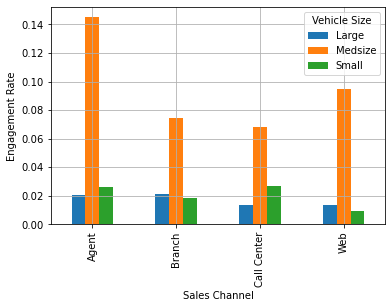

In [85]:
ax5 = sales_channel_vehicle_rate.plot(kind = 'bar', grid = True)
ax5.set_ylabel('Engagement Rate')
plt.show()

As shown in the graph, customers with medium sized vehicles respond the most to all sales channels. 

### 2.6 Engagement Rate by Month Since Policy Inception

In [88]:
df_month = df.loc[df['Response']== 'Yes'].groupby(
    'Months Since Policy Inception')['Response'].count()
df_month

Months Since Policy Inception
0     12
1     12
2     18
3     30
4     18
      ..
93    24
94    18
95    12
96    12
99     6
Name: Response, Length: 91, dtype: int64

In [92]:
df_month_rate = df_month/df.groupby('Months Since Policy Inception')['Response'].count()
df_month_rate = df_month_rate.fillna(0)
df_month_rate

Months Since Policy Inception
0     0.144578
1     0.141176
2     0.202247
3     0.263158
4     0.197802
        ...   
95    0.155844
96    0.179104
97    0.000000
98    0.000000
99    0.076923
Name: Response, Length: 100, dtype: float64

Text(0, 0.5, 'Months Since Policy Inception')

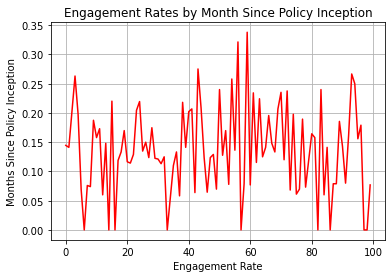

In [93]:
ax6 = df_month_rate.plot(title = 'Engagement Rates by Month Since Policy Inception', grid = True, color = 'red')
ax6.set_xlabel('Engagement Rate')
ax6.set_ylabel('Months Since Policy Inception')

## 3. Customer Segmentation

Perform customer Segmentation based on customer lifetime value and months since policy inception

In [95]:
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

As described by the statistics, the customer lifetime value of the dataset range from low as 1898 to high as 83325, which is a really dramatic difference. We would define the customers with a CLV of higher than the median as high-CLV customers, and those with a CLV of lower than the median as low-CLV customers.

In [97]:
df['CLV'] = df['Customer Lifetime Value'].apply(lambda x: 
                                               'High' if x > df['Customer Lifetime Value'].median()
                                               else 'Low')
df['CLV'].value_counts()

Low     4568
High    4566
Name: CLV, dtype: int64

In [98]:
df['Policy Age'] = df['Months Since Policy Inception'].apply(lambda x: 
                                               'High' if x > df['Months Since Policy Inception'].median()
                                               else 'Low')
df['Policy Age'].value_counts()

Low     4632
High    4502
Name: Policy Age, dtype: int64

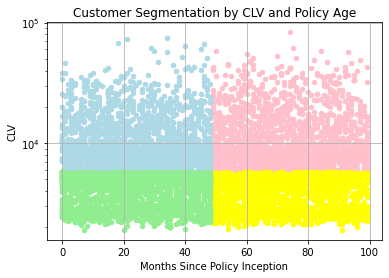

In [108]:
ax_seg = df.loc[
    (df['CLV'] == 'High') & (df['Policy Age'] == 'High')
].plot.scatter(
    x = 'Months Since Policy Inception',
    y = 'Customer Lifetime Value',
    color = 'pink',
    logy = True
)

df.loc[
    (df['CLV'] == 'Low') & (df['Policy Age'] == 'High')
].plot.scatter(
    ax=ax_seg,
    x = 'Months Since Policy Inception',
    y = 'Customer Lifetime Value',
    color = 'yellow',
    logy = True
)

df.loc[
    (df['CLV'] == 'High') & (df['Policy Age'] == 'Low')
].plot.scatter(
    ax=ax_seg,
    x = 'Months Since Policy Inception',
    y = 'Customer Lifetime Value',
    color = 'lightblue',
    logy = True
)

df.loc[
    (df['CLV'] == 'Low') & (df['Policy Age'] == 'Low')
].plot.scatter(
    ax=ax_seg,
    x = 'Months Since Policy Inception',
    y = 'Customer Lifetime Value',
    color = 'lightgreen',
    grid = True,
    logy = True
)

ax_seg.set_ylabel('CLV')
ax_seg.set_xlabel('Months Since Policy Inception')
ax_seg.set_title('Customer Segmentation by CLV and Policy Age')
plt.show()

Since the range for customers with 'High' for CLV is very large and the values are skewed at the high level values, I have used logy=True to transform the values based on a log scale.

In [110]:
engagement_segment = df.loc[df['Response'] == 'Yes'
                           ].groupby(['CLV','Policy Age']).count()['Customer']
engagement_segment

CLV   Policy Age
High  High          312
      Low           306
Low   High          366
      Low           324
Name: Customer, dtype: int64

In [113]:
engagement_segment_rate = engagement_segment / df.groupby(['CLV','Policy Age']).count()['Customer']
engagement_segment_rate = engagement_segment_rate.unstack()
engagement_segment_rate

Policy Age,High,Low
CLV,,
High,0.138728,0.132067
Low,0.162450,0.139957


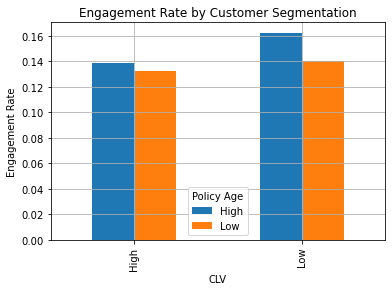

In [114]:
ax_new = engagement_segment_rate.plot(kind = 'bar',
                                     grid = True)
ax_new.set_ylabel('Engagement Rate')
ax_new.set_title('Engagement Rate by Customer Segmentation')
plt.show()

According to the plot, customers who have had policies with the company for a longer period have a higher engagement rate compared to those with shorter policy durations. This indicates that long-standing customers are more responsive. Additionally, among all customer segments, the group with a high policy age and low customer lifetime value (CLV) exhibits the highest engagement rate.

Based on the analysis, we can use the response rates to design different marketing messages according to the characteristics of different customer segments.